# How PyPy can help High Performance Computing

# Short bio

* PyPy core dev since 2006
* pdb++, CFFI, vmprof, capnpy, ...
* @antocuni
* https://github.com/antocuni
* https://bitbucket.org/antocuni

# How many of you use Python?

# How many have ever had performance problems?

# Why do you use Python, then?

# Python strong points

* Simplicity
* Lots of libraries
* Ecosystem

<img src="images/ken-treloar-346065-unsplash.jpg" />

<div align="right"><small>Photo by <a href="https://unsplash.com/photos/yjePAp-tpmQ">Ken Treloar</a> on <a href="https://unsplash.com/">Unsplash</a></small></div>

# Python *REAL* strong points

* Expressive & simple APIs
* Uniform typesystem (everything is an object)
* Powerful abstractions


# Example: JSON

```java
JSONObject jsonObj = new JSONObject(jsonString);

JSONArray jArray = jsonObj.getJSONArray("data");
int length = jArray.length();
for(int i=0; i<length; i++) {
    JSONObject jObj = jArray.getJSONObject(i);
    String id = jObj.optString("id");
    String name=jObj.optString("name");

    JSONArray ingredientArray = jObj.getJSONArray("Ingredients");
    int size = ingredientArray.length();
    ArrayList<String> Ingredients = new ArrayList<>();

    for(int j=0; j<size; j++) {
        JSONObject json = ja.getJSONObject(j);
        Ingredients.add(json.optString("name"));
    }
}

// googled for "getJSONArray example", found this:
// https://stackoverflow.com/questions/32624166/how-to-get-json-array-within-json-object

```

```python
obj = json.loads(string)
for item in obj['data']:
    id = item['id']
    name = item['name']
    ingredients = []
    for ingr in item["ingredients"]:
        ingredients.append(ingr['name'])
```

# So far so good, BUT

<center><img src="images/abstractions.svg" width="50%" /></center>

<center><img src="images/toy-story.jpg" width="100%" /></center>

# Example of temporary objects
## Bound methods

In [ ]:
class A(object):
    def foo(self):
        return 42

a = A()
bound_foo = a.foo
%timeit a.foo()
%timeit bound_foo()

# Ideally
### Think of concepts, not implementation details


# Real world
### Details leak to the user

# Python problem
### Tension between abstractions and performance

# Classical Python approaches to performance

# 1. Work around in the user code
### e.g. create bound methods beforehand

# 2. Work around in the language specs

* range vs xrange
* dict.keys vs .iterkeys 
* int vs long
* array.array vs list

* Easier to implement
* Harder to use
* Clutter the language unnecessarily
* More complex to understand
* Not really Pythonic

# 3. Stay in C as much as possible

In [2]:
numbers = range(1000)
% timeit [x*2 for x in numbers]

The slowest run took 11.03 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 52 µs per loop


In [3]:
import numpy as np

numbers = np.arange(1000)
% timeit numbers*2

The slowest run took 428.56 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.53 µs per loop


# 4. Rewrite in C

* `#include "Python.h"`
* Cython
* CFFI


# "Rewrite in C" approach
## aka, 90/10 rule

<img src="images/90-10-rule-1.svg">

<img src="images/90-10-rule-2.svg">

<img src="images/90-10-rule-3.svg">

* Abstractions cost
* Code quality => poor performance
* Python parts become relevant

# Python in the HPC world

# Python as a glue-only language

# Tradeoff between speed and code quality

# PyPy

* Alternative Python implementation
* Ideally: no visible difference to the user
* JIT compiler
* http://pypy.org

# How fast is PyPy?

### Wrong question

* Up to 80x faster in extreme cases
* 10x faster in good cases
* 2x faster on "random" code
* sometime it's just slower 

# PyPy flaws

* Far from being perfect
* it leaks *other* implementation details than CPython
  - e.g. JIT warmup, GC pecularities


# PyPy qualities

# Make pythonic, idiomatic code fast

# Abstractions are (almost) free



# The better the code, the biggest the speedup

<img src="images/90-10-rule-1.svg">

<img src="images/90-10-rule-pypy.svg">

# Python as a first class language
# No longer "just glue"

# Example: Sobel filter

* Extendend version
  - "The Joy of PyPy: Abstractions for Free", EP 2017

* https://speakerdeck.com/antocuni/the-joy-of-pypy-jit-abstractions-for-free
* https://www.youtube.com/watch?v=NQfpHQII2cU

<img src="images/sobel-cpython.png">

<img src="images/sobel-pypy.png">

# 59x ⇨ 428x faster

# The *BIG* problem: C extensions

## CPython
<img src="images/calling-C-cpython.svg">

## PyPy (cpyext)
<img src="images/calling-C-cpyext.svg">

# cpyext

* PyPy version of `Python.h`
* Compatibility layer
* Most C extensions just work: numpy, scipy, pandas, etc.
* Slow :(
* Use CFFI whenever it's possible

# We are working on it

In [29]:
%matplotlib inline
def plot_benchmarks(*pythons):
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt

    matplotlib.rcParams['figure.figsize'] = (15,6)

    data = {"CPython": {"simple.noargs": 0.43, "simple.onearg(None)": 0.45, "simple.onearg(i)": 0.44, "simple.varargs": 0.6, "simple.allocate_int": 0.46, "simple.allocate_tuple": 0.81, "Foo().noargs": 0.44, "Foo().onearg(None)": 0.48, "Foo().onearg(i)": 0.47, "Foo().varargs": 0.63, "len(Foo())": 0.34, "Foo()[0]": 0.25},
            "PyPy 5.8": {"simple.noargs": 1.09, "simple.onearg(None)": 1.34, "simple.onearg(i)": 2.6, "simple.varargs": 2.74, "simple.allocate_int": 2.49, "simple.allocate_tuple": 8.21, "Foo().noargs": 1.27, "Foo().onearg(None)": 1.55, "Foo().onearg(i)": 2.85, "Foo().varargs": 3.06, "len(Foo())": 1.36, "Foo()[0]": 1.53},
            "PyPy 5.9": {"simple.noargs": 0.16, "simple.onearg(None)": 0.2, "simple.onearg(i)": 1.61, "simple.varargs": 3.08, "simple.allocate_int": 1.69, "simple.allocate_tuple": 6.39, "Foo().noargs": 1.17, "Foo().onearg(None)": 1.74, "Foo().onearg(i)": 3.03, "Foo().varargs": 2.95, "len(Foo())": 1.24, "Foo()[0]": 1.37},
            "PyPy 5.10": {"simple.noargs": 0.18, "simple.onearg(None)": 0.21, "simple.onearg(i)": 1.52, "simple.varargs": 2.59, "simple.allocate_int": 1.67, "simple.allocate_tuple": 6.44, "Foo().noargs": 1.12, "Foo().onearg(None)": 1.41, "Foo().onearg(i)": 2.62, "Foo().varargs": 2.89, "len(Foo())": 1.21, "Foo()[0]": 1.32},
            "PyPy 6.0": {"simple.noargs": 0.18, "simple.onearg(None)": 0.2, "simple.onearg(i)": 0.22, "simple.varargs": 0.42, "simple.allocate_int": 0.89, "simple.allocate_tuple": 5.02, "Foo().noargs": 0.19, "Foo().onearg(None)": 0.22, "Foo().onearg(i)": 0.24, "Foo().varargs": 0.45, "len(Foo())": 0.15, "Foo()[0]": 0.28}}



    #pythons = data.keys()
    #pythons = ["CPython", "PyPy 5.10", "PyPy 6.0"]
    benchmarks = data[pythons[0]].keys()

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(len(benchmarks))
    bar_width = 0.20
    opacity = 0.8

    colors = 'bgryk'

    for i, python in enumerate(pythons):
        values = [data[python][bench] for bench in benchmarks]
        normalized = [v/data['CPython'][bench] for (v, bench) in zip(values, benchmarks)]
        #print python, values
        rects1 = plt.bar(index + bar_width*i, normalized, bar_width,
                         label=python,
                         color=colors[i])

    plt.xlabel('Benchmark')
    plt.ylabel('Time (normalized)')
    plt.title('cpyext microbenchmarks')
    plt.xticks(index + bar_width, benchmarks, rotation=45)
    plt.legend()

    plt.show()



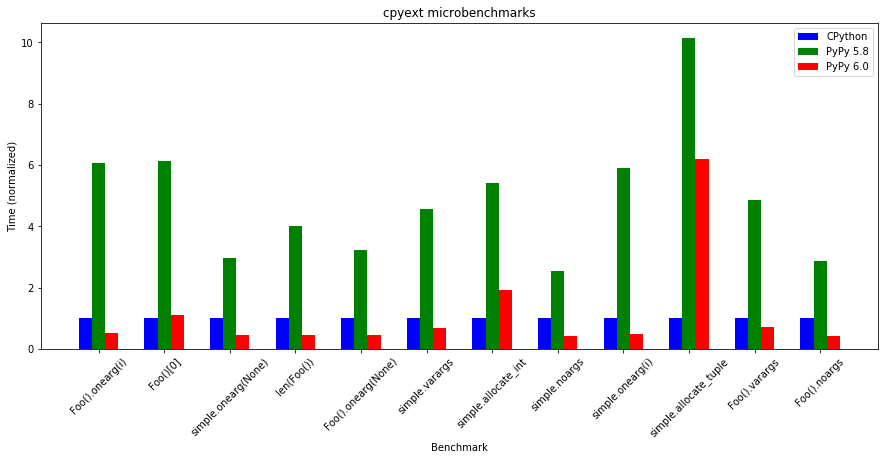

In [35]:
plot_benchmarks("CPython", "PyPy 5.8", "PyPy 6.0")

# Future status (hopefully)
* All C extensions will just work
* C code as fast as today, Python code super-fast
* The best of both worlds
* PyPy as the default choice for HPC



My personal estimate: 6 months of work and we have a fast cpyext

(let's talk about money :))

# That's all
## Questions?